In [1563]:
from datetime import datetime
print(f'Päivitetty {datetime.now().strftime('%d.%m.%Y')} / Tatu Erkinjuntti')

Päivitetty 11.11.2024 / Tatu Erkinjuntti


# Tehtävä 2.



## Osa 1 - aikasarjat


Valitse kahden pörssiosakkeen kurssihistoriat, ei kuitenkaan esimerkkimuistioissa esiintyviä Elisaa tai Teliaa (voi myös käyttää raaka-aineiden tai virtuaalivaluuttojen hintahistorioita) ja analysoi niitä opituilla menetelmillä. Lisää mukaan mahdollisimman paljon omia kommentteja ja selitystä.

Osakkeiden kurssihistorioita ja raaka-aineiden/valuuttojen hintahistorioita saat Yahoo Finance -palvelusta:

1) avaa https://finance.yahoo.com/

2) Etsi (search) haluamasi yritys esim NOKIA.HE

3) Klikkaa "Historical Data

4) Määritä päivämäärät haulle ja sitten "download"


## Osa 2 - aikasarjaennustaminen


Valitse yksi seuraavista aikasarjoista tai käytä jotain omaa aikasarjaa ja analysoi kommentoiden opituilla menetelmillä.

### Aikasarjoja

Seuraavissa aikasarjoissa on kaikissa sekä trendi että kausivaihtelu.

#### Ilman CO2-pitoisuuksia kuukausittain. 
Siististi käyttäytyvä aikasarja, jolle saa laskettua tarkkoja ennusteita.

Lähde: https://www.esrl.noaa.gov/gmd/webdata/ccgg/trends/co2/co2_mm_mlo.txt

Aukenee säädylliseen dataframeen suoraan lähteestä seuraavan esimerkin mukaisesti.

#### Lentomatkustajien lukumääriä AirPassengers.csv. 

Tästä aikasarjasta löytyy netistä paljon laskettuja esimerkkejä eri ennustusmenetelmille.

Lähde: https://www.kaggle.com/rakannimer/air-passengers

tai täällä


Aukenee säädylliseen dataframeen seuraavasti:

df=pd.read_csv('AirPassengers.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

#### Oluen tuotantomääriä beer.csv

Lähde: https://www.kaggle.com/shenba/time-series-datasets

löytyy myös täältä

Aukenee säädylliseen dataframeen seuraavasti:

df=pd.read_csv('beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

#### Sähkön tuotantoa Electric_Production.csv (löytyy data-paketista)

Lähde: https://www.kaggle.com/shenba/time-series-datasets

löytyy myös täältä

Aukenee säädylliseen dataframeen seuraavasti:

df=pd.read_csv('Electric_Production.csv')
df.index=pd.to_datetime(df['DATE'],format='%m/%d/%Y')
df=df.drop('DATE',axis=1)
df.head()




## Tehtävän alustus

Haetaan tarvittavat kirjastot ja määritellään käytetyt data-aineistot. Itse teen tämän aina kerralla ohjelman alussa, näin yhdellä silmäyksellä näkee ohjelman riippuvaisuudet. Jos käytössä olisi pysyviä muuttujia, tulisi ne myös alustaa samalla.  

In [1564]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import yfinance as yf

from scipy.stats import pearsonr

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

sns.set_style('whitegrid')

electric_procuction = '../Data/Electric_Production.csv'

## Osa 1, aikasarjat - Virtuaalivaluutat

Valitsin tähän tehtävään kahden virtuaalivaluutan kurssihistorian, Bitcoin (BTC-USD) sekä Ethereum (ETH-USD) . 
Syy tähän on oikeastaan kiinnostus virtaalivaluutoiden kurssikehitykseen. 

Alunperin valitsin tutkittavaksi ajanjaksoksi 10 vuotta, sillä esim. Bitcoinin osalta sen kurssihistoria on ollut varsin korkealentoinen viime vuosikymmenen aikana, mutta ikävä kyllä Ethereum on noteraatu vasta vuodesta 2017, päädyin että tutkittava ajankohta alkaa vuodesta 2018 jotta näillä olisi jotain vertailukelpoisuutta.

- Molempien virtuaalivaluuttojen kurssihistoria perustuu sen suhteeseen Yhdysvaltain Dollarin arvoon.

Aloitetaan hakemalla data-aineisto.

In [1565]:
# HUOM! koska aikaisemmin mainittiin 10 vuotta, niin ulotetaan data-aineisto 10 vuoden päähän.
ethereum_d = yf.download('ETH-USD', start='2018-1-1')
bitcoin_d = yf.download('BTC-USD', start='2018-1-1')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Aloitetaan tutkimalla Ethereumin data-aineisto.

In [1566]:
ethereum_d

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,,
2018-01-01 00:00:00+00:00,772.640991,772.640991,782.530029,742.004028,755.757019,2595760128
2018-01-02 00:00:00+00:00,884.443970,884.443970,914.830017,772.346008,772.346008,5783349760
2018-01-03 00:00:00+00:00,962.719971,962.719971,974.471008,868.450989,886.000000,5093159936
2018-01-04 00:00:00+00:00,980.921997,980.921997,1045.079956,946.085999,961.713013,6502859776
2018-01-05 00:00:00+00:00,997.719971,997.719971,1075.390015,956.325012,975.750000,6683149824
...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,2895.585449,2895.585449,2918.744385,2701.590820,2724.005859,35352318438
2024-11-08 00:00:00+00:00,2962.296631,2962.296631,2983.744873,2889.484375,2895.597900,32303261101


Katsotaan nyt miltä Bitcoinin data-aineisto näyttää.

In [1567]:
bitcoin_d

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2018-01-01 00:00:00+00:00,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02 00:00:00+00:00,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03 00:00:00+00:00,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04 00:00:00+00:00,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05 00:00:00+00:00,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072
...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,75904.859375,75904.859375,76943.117188,74480.421875,75637.085938,63467654989
2024-11-08 00:00:00+00:00,76545.476562,76545.476562,77252.750000,75648.742188,75902.835938,55176858003


Huomaamme data-aineiston riveistä, että koska valittu aineisto yltää yli kymmenen vuoden päähän, on meillä molemmissa tapauksissa sopivan suuri aineisto pohja.

Tarkastetaan seuraavaksi kehitystä yleisesti viivakaavion avulla. Keskitytään päivän päätös hintaan => 'Close'.

<Axes: xlabel='Date'>

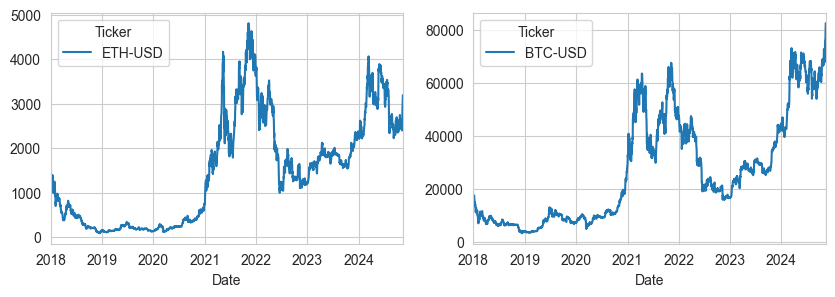

In [1568]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close'].plot(ax=axs[0])
bitcoin_d['Close'].plot(ax=axs[1])

Huomaamme että Bitcoin painii aivan omassa sarjassaan arvonsa osalta mutta pystymme näkemään yhtäläisyyksiä kurssikehityksen suhteen. Vuodet 2021 - 2022 olivat erittäin tuottavia molempien virtuaalivaluuttojen osalta.

Tarkastellaan tarkkemmin noita vuosia 2021 - 2022, keskitytään tähän aikaväliin. 

<Axes: xlabel='Date'>

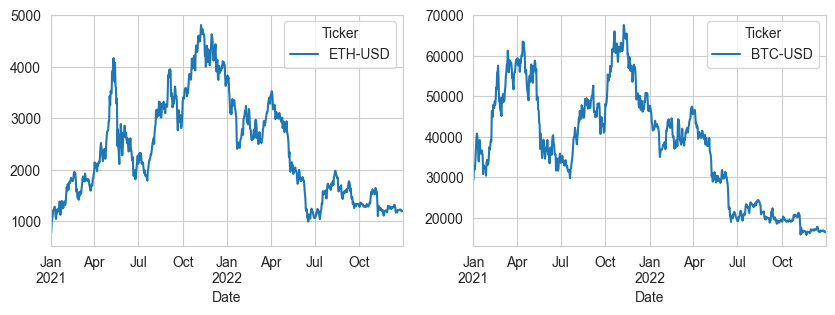

In [1569]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close']['2021':'2022'].plot(ax=axs[0])
bitcoin_d['Close']['2021':'2022'].plot(ax=axs[1])

Vuoden 2021 nousujohde ei mielestäni näy tässä kunnolla, varsinkin Bitcoinin osalta. Otetaan vuosi 2020 mukaan, jotta saamme nousun alun näkymään.

<Axes: xlabel='Date'>

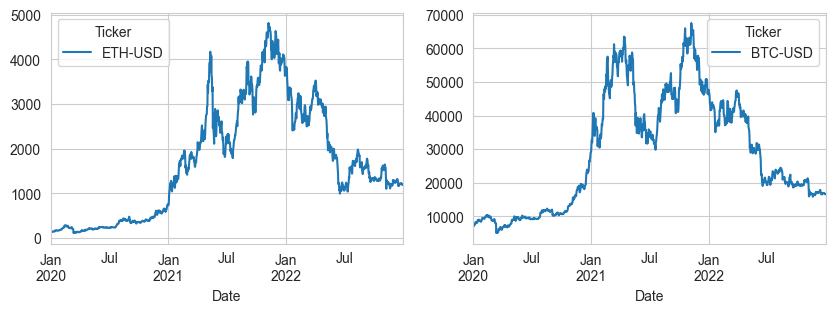

In [1570]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close']['2020':'2022'].plot(ax=axs[0])
bitcoin_d['Close']['2020':'2022'].plot(ax=axs[1])

Aggregoidaan tämä kuukaisitasolle.

<Axes: xlabel='Date'>

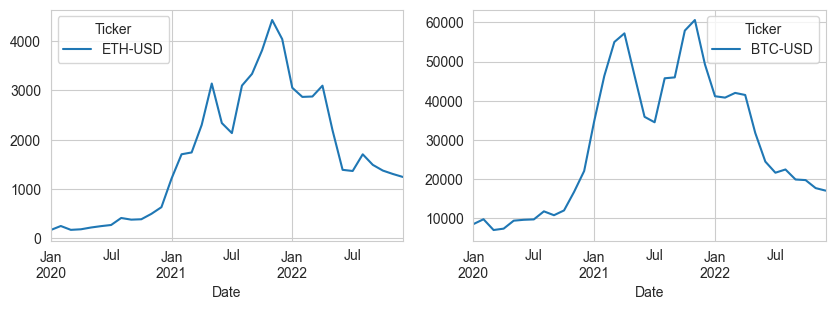

In [1571]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close']['2020':'2022'].resample('ME').mean().plot(ax=axs[0])
bitcoin_d['Close']['2020':'2022'].resample('ME').mean().plot(ax=axs[1])

Nyt molempien kurssian vuosien 2020 - 2022 aikana tapahtunut piikki näkyy selkeämmin. 

Palaan takaisin koko data-aineiston pariin. Vaikka molempien virtuaalivaluuttojen kursseissa ei näy nopeatempoista fluktuaatiota, tasoitetaan viivakaavioita liukuvilla keskiarvoilla.
Tutkitaan aluksi kuukauden (30 päivää) liukuvalla keskiarvolla.

<Axes: xlabel='Date'>

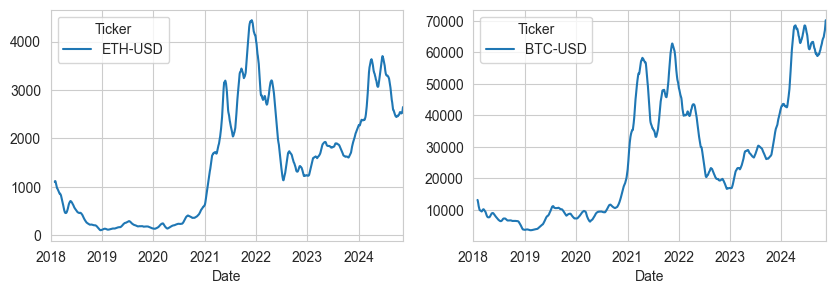

In [1572]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close'].rolling(30).mean().plot(ax=axs[0])
bitcoin_d['Close'].rolling(30).mean().plot(ax=axs[1])

Vaikka graafia saatinkin mukavasti tasoitettua, kokeillaan hieman pidempää aikaväliä, vaikka vuosineljännes (~ 90 päivää).

<Axes: xlabel='Date'>

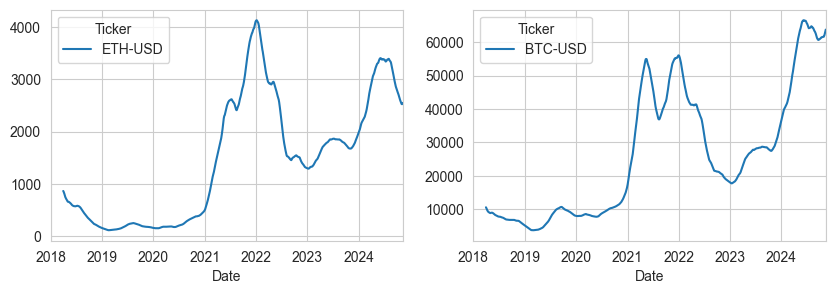

In [1573]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close'].rolling(90).mean().plot(ax=axs[0])
bitcoin_d['Close'].rolling(90).mean().plot(ax=axs[1])

Tämä näyttää paljon paremmalla. 

Voidaan jälkiviisana todeta että molempiin virtuaalivaluuttoihin olisi ollut kannattavaa sijoittaa viimeistään vuoden 2020 aikana. Ajankohta sijoituksensa myymiseen voitolla vaihtelee näiden kahden virtuaalivaluutan kanssa. Ethereumin osalta otollisin aika olisi ollut alkuvuodesta 2022. Bitcoinin osalta toistuu myös sama ajankohta, mutta jos olisi malttanut pitää omistuksistaan kiinni 2022 alkaneen pudotuksen ajan, joka kesti alkuvuoteen 2024 asti, olisi vuoden 2024 arvon nousu tuonnut vielä suuremmat tuotot kuin vuoden 2022 piikki. 

Koska näiden molemmissa virtuaalivaluutoissa on tapahtunut merkittävä arvon muutos tarkasteltavalla aikavälillä, voitaisiin tutkia onko näiden välillä jotain yhteyttä. Toisin sanoen voidaanko olettaa että Bitcoinin arvon nousu on vaikuttanut myös Ethereumiin.

Aloitetaan tämä tarkastelemella näiden virtuaalivaluuttoje  arvon muutosprosenttia valitulla ajanjaksolla.

In [1574]:
# Tehdään taulukkoon oma sarake päiväkohtaiselle muutosprosentille. 
# Otetaan arvonmuutos päivän päätöshinnan mukaan.

bitcoin_d['Bitcoin_value_change_%'] = bitcoin_d['Close'].pct_change()
ethereum_d['Ethereum_value_change_%'] = ethereum_d['Close'].pct_change()

# Tarkastetaan muutos mutta otetaan vain ensimmäiset viisi riviä.
bitcoin_d.head()

Price,Adj Close,Close,High,Low,Open,Volume,Bitcoin_value_change_%
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,,
2018-01-01 00:00:00+00:00,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000,NaN
2018-01-02 00:00:00+00:00,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192,0.097011
2018-01-03 00:00:00+00:00,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160,0.014611
2018-01-04 00:00:00+00:00,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744,0.026196
2018-01-05 00:00:00+00:00,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072,0.117333


In [1575]:
ethereum_d.head()

Price,Adj Close,Close,High,Low,Open,Volume,Ethereum_value_change_%
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,
Date,,,,,,,
2018-01-01 00:00:00+00:00,772.640991,772.640991,782.530029,742.004028,755.757019,2595760128,NaN
2018-01-02 00:00:00+00:00,884.443970,884.443970,914.830017,772.346008,772.346008,5783349760,0.144702
2018-01-03 00:00:00+00:00,962.719971,962.719971,974.471008,868.450989,886.000000,5093159936,0.088503
2018-01-04 00:00:00+00:00,980.921997,980.921997,1045.079956,946.085999,961.713013,6502859776,0.018907
2018-01-05 00:00:00+00:00,997.719971,997.719971,1075.390015,956.325012,975.750000,6683149824,0.017125


In [1576]:
# Luodaan uusi muuttuja, johon tallennetaan aikaisemmin lasketut muutosprosentit.
value_changes = pd.concat([bitcoin_d['Bitcoin_value_change_%'], ethereum_d['Ethereum_value_change_%']], axis=1)

# Muutetaan NaN (Not a Number) lukemat numeraaliseen muotoon, jotta se ei vaikutua laskutoimenpiteisiin.
value_changes = value_changes.fillna(0)
value_changes

,Bitcoin_value_change_%,Ethereum_value_change_%
Date,,
2018-01-01 00:00:00+00:00,0.000000,0.000000
2018-01-02 00:00:00+00:00,0.097011,0.144702
2018-01-03 00:00:00+00:00,0.014611,0.088503
2018-01-04 00:00:00+00:00,0.026196,0.018907
2018-01-05 00:00:00+00:00,0.117333,0.017125
...,...,...
2024-11-07 00:00:00+00:00,0.003514,0.062924
2024-11-08 00:00:00+00:00,0.008440,0.023039
2024-11-09 00:00:00+00:00,0.003049,0.056999


Katsotaan uteliaisuudesta kuinka usein päiväkohtainen muutos on yli 10 prosenttia.

In [1577]:
value_changes[(abs(value_changes['Bitcoin_value_change_%']) >0.10) | abs(value_changes['Ethereum_value_change_%'] > 0.10)]

,Bitcoin_value_change_%,Ethereum_value_change_%
Date,,
2018-01-02 00:00:00+00:00,0.097011,0.144702
2018-01-05 00:00:00+00:00,0.117333,0.017125
2018-01-07 00:00:00+00:00,-0.059873,0.107029
2018-01-09 00:00:00+00:00,-0.037884,0.131655
2018-01-11 00:00:00+00:00,-0.104686,-0.080338
...,...,...
2024-01-10 00:00:00+00:00,0.010578,0.101191
2024-03-20 00:00:00+00:00,0.096925,0.112672
2024-05-20 00:00:00+00:00,0.078002,0.192722


Näitä löytyy yllättävän paljon, 101 päiväkohtaista tapausta jolloin jomman kumman virtuaalivaluutan arvossa on ollut 10 prosentin muutos.

Tarkastellaan näiden kahden korrelaatiota.

In [1578]:
value_changes.corr()

,Bitcoin_value_change_%,Ethereum_value_change_%
Bitcoin_value_change_%,1.000000,0.818474
Ethereum_value_change_%,0.818474,1.000000


Voidaan todeta että näiden kahden virtuaalivaluutan arvonvaihtelulla on hyvin voimakas korrelaatio (yli 0.80). Tehdään tästä vielä liukuva korrelaatio, jotta tämän pystyy näkemään paremmin suhteessa valittuun ajanjaksoon.

<Axes: xlabel='Date'>

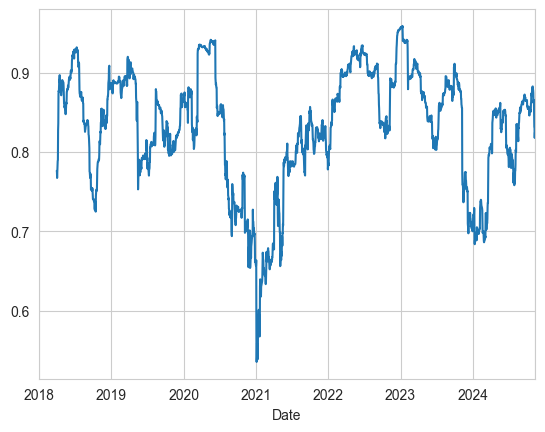

In [1579]:
#Pidetään valittuna aikavälinä samaa vuosineljännestä (90 päivää) mitä käytettiin aikaisemmin.
value_changes['Bitcoin_value_change_%'].rolling(90).corr(value_changes['Ethereum_value_change_%']).plot()

Nähdään että koko valittuna ajanjaksona molemmilla virtuaalivaluutoilla on ollut erittäin voimakas positiivinen korrelaatio toisiinsa.  

Tutkitaan vielä vielä käydyn kauppamäärän ja arvonmuutoksen suhdetta toisiinsa, kasvaako kaupankäynti kun virtuaalivaluutan arvo laskee tai nousee. Toisin sanoen, löydetäänkö viitteitä markkinapaniikista suuntaan tai toiseen.

In [1580]:
# Luodaan uusi taulu, johon otetaan arvon muutosprosentti ja käyty kauppamäärä päiväkohtaisesti.

bitcoin_value_change_volume = pd.concat([bitcoin_d['Bitcoin_value_change_%'], bitcoin_d['Volume']], axis=1)
ethereum_value_change_volume = pd.concat([ethereum_d['Ethereum_value_change_%'], ethereum_d['Volume']], axis=1)

# Muutetaan taas NAN arvot nolliksi. käytetään inplace parametria, jotta tätä muutosta ei tarvitse osoittaa uuteen tai samaan muuttujaan.
bitcoin_value_change_volume.fillna(0, inplace=True)
ethereum_value_change_volume.fillna(0, inplace=True)

# Tarkastetaan vielä dataframe.
bitcoin_value_change_volume


,Bitcoin_value_change_%,BTC-USD
Date,,
2018-01-01 00:00:00+00:00,0.000000,10291200000
2018-01-02 00:00:00+00:00,0.097011,16846600192
2018-01-03 00:00:00+00:00,0.014611,16871900160
2018-01-04 00:00:00+00:00,0.026196,21783199744
2018-01-05 00:00:00+00:00,0.117333,23840899072
...,...,...
2024-11-07 00:00:00+00:00,0.003514,63467654989
2024-11-08 00:00:00+00:00,0.008440,55176858003
2024-11-09 00:00:00+00:00,0.003049,29009480361


In [1581]:
ethereum_value_change_volume

,Ethereum_value_change_%,ETH-USD
Date,,
2018-01-01 00:00:00+00:00,0.000000,2595760128
2018-01-02 00:00:00+00:00,0.144702,5783349760
2018-01-03 00:00:00+00:00,0.088503,5093159936
2018-01-04 00:00:00+00:00,0.018907,6502859776
2018-01-05 00:00:00+00:00,0.017125,6683149824
...,...,...
2024-11-07 00:00:00+00:00,0.062924,35352318438
2024-11-08 00:00:00+00:00,0.023039,32303261101
2024-11-09 00:00:00+00:00,0.056999,29210133088


Huomataan että "Volume" sarakkeen nimeksi on tullut sen "Ticker" ("virtuaalivaluutta"-USD), muutetaan tämä jotta tämä on helpommin ymmärrettävä.

In [1582]:
bitcoin_value_change_volume.rename(columns = {'BTC-USD': 'Volume'}, inplace=True)
ethereum_value_change_volume.rename(columns = {'ETH-USD': 'Volume'}, inplace=True)

# Tarkastetaan muutokset

bitcoin_value_change_volume


,Bitcoin_value_change_%,Volume
Date,,
2018-01-01 00:00:00+00:00,0.000000,10291200000
2018-01-02 00:00:00+00:00,0.097011,16846600192
2018-01-03 00:00:00+00:00,0.014611,16871900160
2018-01-04 00:00:00+00:00,0.026196,21783199744
2018-01-05 00:00:00+00:00,0.117333,23840899072
...,...,...
2024-11-07 00:00:00+00:00,0.003514,63467654989
2024-11-08 00:00:00+00:00,0.008440,55176858003
2024-11-09 00:00:00+00:00,0.003049,29009480361


Tarkastestellaan kaupankäynti määärien ja arvonvaihtelun mahdollinen korrelaatio ja otetaan mukaan vielä P-arvo, jolloin saadaan viitettä onko tämä vain sattumaa vai voidaanko olettaa että näiden välillä on oikeasti suhde.

In [1583]:

r, p = pearsonr(bitcoin_value_change_volume['Volume'], bitcoin_value_change_volume['Bitcoin_value_change_%'])
print(f'Bitcoin arvon muutoksen suhde kauppamäärään: Korrelaatiokerroin (r) = {r:>6.3f}, P-arvo (p) = {p:.3f}')

Bitcoin arvon muutoksen suhde kauppamäärään: Korrelaatiokerroin (r) =  0.017, P-arvo (p) = 0.386


In [1584]:
r, p = pearsonr(ethereum_value_change_volume['Volume'], ethereum_value_change_volume['Ethereum_value_change_%'])
print(f'Ethereum arvon muutoksen suhde kauppamäärään: Korrelaatiokerroin (r) = {r:>6.3f}, P-arvo (p) = {p:.3f}')

Ethereum arvon muutoksen suhde kauppamäärään: Korrelaatiokerroin (r) =  0.021, P-arvo (p) = 0.287


P-arvo (Alle 0.05) molemmissa tapauksissa osoittaa että näiden kahden muuttujan välillä on todella korrelaatiota. Korrelaatio näyttää olevan positiivinen (yli 0.25) mutta ei läheskään niin voimakas kun kahden virtuaalivaluutan arvon suhde toisiinsa. Tehdään näistä vielä hajontakaaviot, jotta pystymme paremmin näkemään tuloksen.

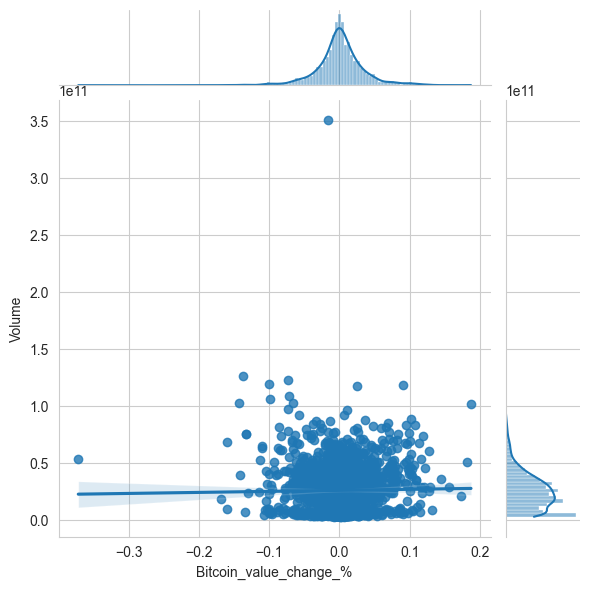

In [1585]:
sns.jointplot(data=bitcoin_value_change_volume, x='Bitcoin_value_change_%', y='Volume', kind='reg')

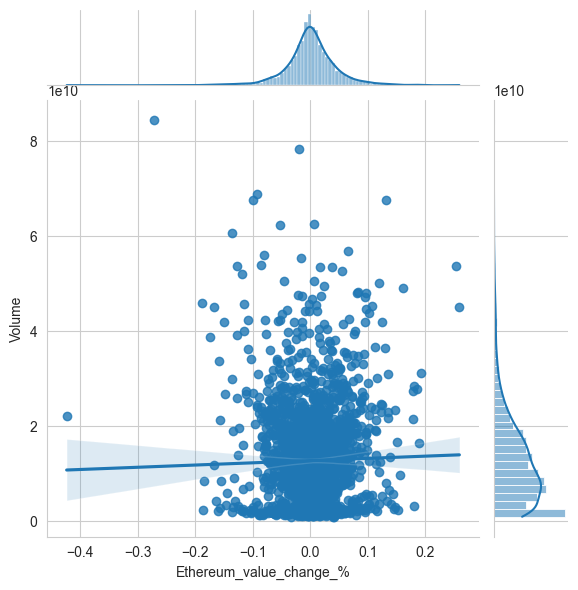

In [1586]:
sns.jointplot(data=ethereum_value_change_volume, x='Ethereum_value_change_%', y='Volume', kind='reg')

Voidaan todeta että vaikka meillä on viittetteitä siitä, että virtuaalivaluutan arvonmuutoksella on vaikutusta kaupankäynnin määrään, ei suhde ole niin selkeä että voisi todeta että tällä on voimakas vaikutus siihen.

Katsotaan vielä liukuva volatiteetti näiden kahden virtuaalivalutaan hinnan muutoksen osalta. Meillä on kuvaa jo siitä miten arvonmuutos on kehittynyt vuosien saatossa, mutta huomioidaan tässä liukuva keskiarvo vuodella (oletus on 252 päivää). Liukuva volatiteetti antaa meille lisää kuvaa mahdollisesta kaupan käynnin riskeistä valittuihin virtuaalivaluuttoihin liittyen.

<Axes: xlabel='Date'>

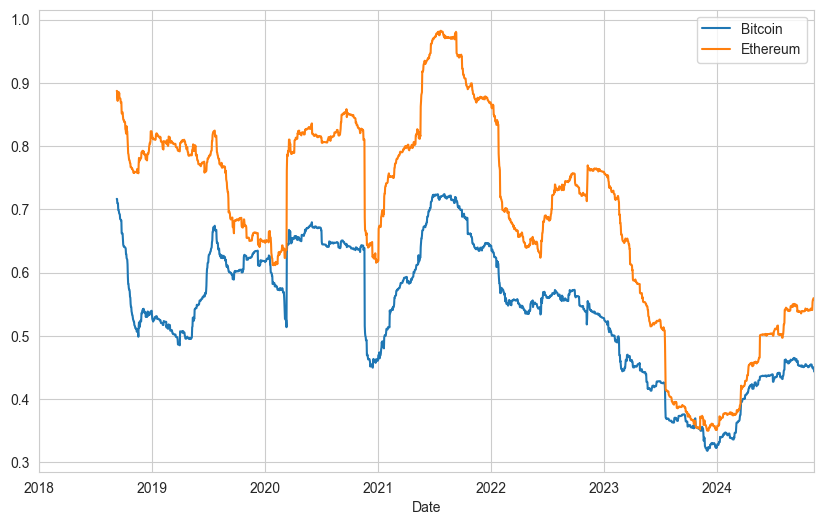

In [1587]:
plt.figure(figsize = (10, 6))
(value_changes['Bitcoin_value_change_%'].rolling(252).std() * (252**0.5)).plot(label='Bitcoin', legend=True)
(value_changes['Ethereum_value_change_%'].rolling(252).std() * (252**0.5)).plot(label='Ethereum', legend=True)

Tulosten puolesta voisi päätellä, että näistä kahdesta virtuaalivaluutasta Bitcoin on vakaampi, vaikka molemmissa virtuaalivaluutoissa esiintyy yli 20 prosentin suuruisia arvon muutoksia vuoden sisällä.  

## Osa 2 - aikasarjaennustaminen - Sähkön tuotanto

Osaan 2 valitsin sähkön tuotannom aikasarjaennustamisen. Tämä on ollut viime vuosina yleisesti kuumaperuna, kun sähkönhinnan osalta on ollut saatavuuden takia paljon heilahtelua. Myönnettäköön että hintaan vaikuttaa nykyään myös sähkönvalmistuksen ympäristövaikutukset mutta usein korkeisiin hintoihin vaikuttaa suoraan sähkön saatavuus. 

Tein hieman taustatutkimusta ja näyttää siltä että käytettävästä datasta ei ole saatavilla paikkatietoa, mistä maasta data on peräisin. 

In [1588]:
# Aloitetaan lukemalla data-ainesto data-frameen.
electric_p_df = pd.read_csv(electric_procuction)
# Tarkistetaan data-aineistoa kokonaisuudessaan hieman näin alkuun.
electric_p_df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


Palatekseni alkuperäiseen kysymykseen data alkuperästä, päivän formatoinnista voidaan päätellä että data-aineisto on mahdollisesti peräisin yhdysvalloista, Keniasta, Kanadasta, Ghanasta, Filippiineiltä. Togolta, Puerto Ricosta, Caymanin saarilta tai Grönlannista, koska se on muodossa kuukausi-päivä-vuosi. (https://en.wikipedia.org/wiki/List_of_date_formats_by_country).

Huomaamme myös että materiaali viimeinen päivitys on vuodelta 2018, eli emme pääse tutkimaan ajankohtaista aineistoa. Tämä liittyy oikeastaan siihen sähkön saatavuuden haasteisiin viime vuosina. 

In [1589]:
# Ajan muotoilu ei oikein ole mieleinen, loogista olisi että tämä olisi muodossa vuosi-kuukausi-päivä,
# jotta aineisto olisi helppolukuisempi. 

# Pandasin to_datetime funktio myös muutta aikaisemman merkkijonon tieodn aikaleimoiksi, jotta niitä pystyy helpommin käsittelemään.
electric_p_df.index=pd.to_datetime(electric_p_df['DATE'],format='%m/%d/%Y')
electric_p_df = electric_p_df.drop('DATE',axis=1)

# Tuosta IPG2211A2N nimi ei oikein ole esittelykelpoinen maallikolle (minulle tässä tapauksessa). Tuotannon määrä on myös hieman kysymysmerkki, joten ehkä turvallisinta käyttää muotoa TWh (TeraWattitunti)
# Nimetään siis IPG2211A2N uudestaan muotoon "Tuotanto (TWh)"
# Date nimi aiheuttaa nyt myös ongelman kielen puolesta, joten nimetään se muotoon "Vuosi-Kuukausi".

electric_p_df.rename(columns = {'IPG2211A2N': 'Tuotanto (TWh)'}, inplace=True)
electric_p_df.index.names = ['Vuosi-Kuukausi']
# Tarkistetaan muutokset
electric_p_df

,Tuotanto (TWh)
Vuosi-Kuukausi,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


En nyt ihan varma onko tuo 'Vuosi-Kuukausi' nimi tyylikäin, mutta ainakin se kuvaava. Jatketaan sillä.

Voisi olettaa että sähkötuonannossa on trendi ja kausivaihtelu, vuosi vuodelta kulutus kasvaa ja syyrin kysyntä on talvisin.  Tarkastellaan tätä hieman jotta voidaan todentaa onko epäilys oikein.

<Axes: xlabel='Vuosi-Kuukausi'>

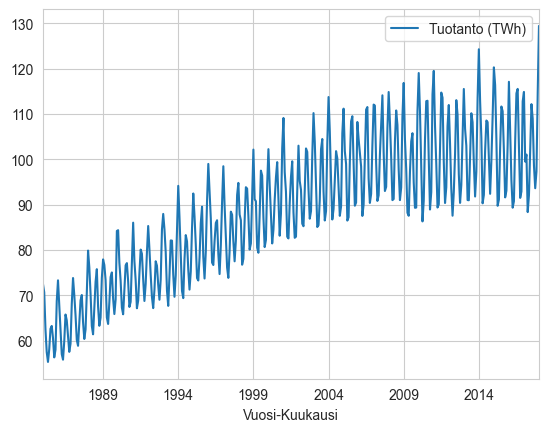

In [1590]:
electric_p_df.plot()

Graaffista näemme että sähkön tuotanto kasvu on nousujohteinen ja voidaan kyllä päätellä että selkeitä kysyntä piikkejä on nähtävissä.

Koska voidaan nähdä että valitussa datassa on sekä tredi että kausivaihtelua, sopii tämän tutkimiseen parhaiten kolminkertainen eksponentiaalinen tasoitus (Holt-Winter menetelmä), mutta tarkastetaan tämä vielä varmuuden vuoksi.

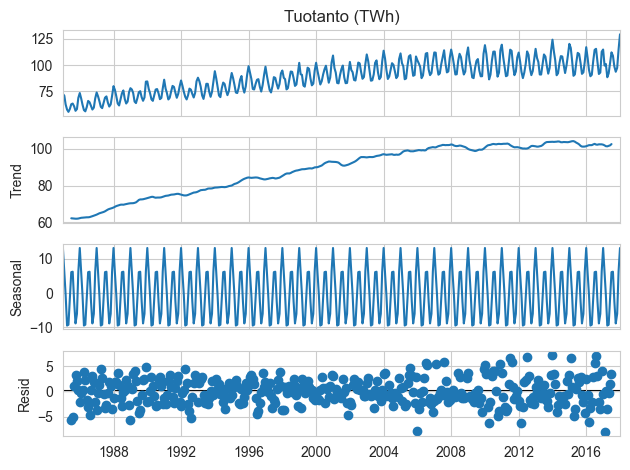

In [1591]:
electric_p_decompose = seasonal_decompose(electric_p_df['Tuotanto (TWh)']).plot()

Kyllä tässä hyvin esiintyy trendi sekä kausivaihtelu.

Aloitetaan rakentamaan ennustemallia, jos pystyisimme sen avulla luotettavammin ennustamaan sähköntuotannon kehtitystä.

Muodostetaan ennustemalli. 
- Käytetään trendiin summamallia.
- Käytetään sekäkausivaihteluun tulomallia
    - **Jälkihuomio** Testailin näiden vaihtelua mutta näyttäisi että tämä yhdistelmä tuottaa parhaimman tuloksen jos vertailee ennustevirheitä.
- kausijaksoiksi laitetaan 12 (kuukaudet vuodessa) ja tämä meneekin yhteen aineiston kanssa
- Frekvenssiksi määritellään kuukauden alku.

In [1592]:
model = ExponentialSmoothing(electric_p_df['Tuotanto (TWh)'],trend='add', seasonal='mul', seasonal_periods=12, freq='MS').fit()
electric_p_df['Ennuste'] = model.fittedvalues
# Tarkastetaan muutokset.
electric_p_df

,Tuotanto (TWh),Ennuste
Vuosi-Kuukausi,,
1985-01-01,72.5052,73.216106
1985-02-01,70.6720,67.505259
1985-03-01,62.4502,65.031906
1985-04-01,57.4714,56.983062
1985-05-01,55.3151,57.668271
...,...,...
2017-09-01,98.6154,99.641159
2017-10-01,93.6137,91.656717
2017-11-01,97.3359,96.282026


In [1593]:
# Silmäillään ennustemallin statistiikkaa vielä.
model.summary()

Dep. Variable:,Tuotanto (TWh),No. Observations:,397
Model:,ExponentialSmoothing,SSE,2230.903
Optimized:,True,AIC,717.311
Trend:,Additive,BIC,781.054
Seasonal:,Multiplicative,AICC,719.121
Seasonal Periods:,12,Date:,"Mon, 11 Nov 2024"
Box-Cox:,False,Time:,16:41:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6633519,alpha,True
smoothing_trend,1.0005e-08,beta,True


Pikaisella silmäyksellä voisin sanoa että ennuste on ihan OK. Aineiston alusta ja lopusta ei ilmene mitään mahdottoman isoja heittoja, mutta tarkastetaan tämä vielä kaaviolla.

<Axes: xlabel='Vuosi-Kuukausi'>

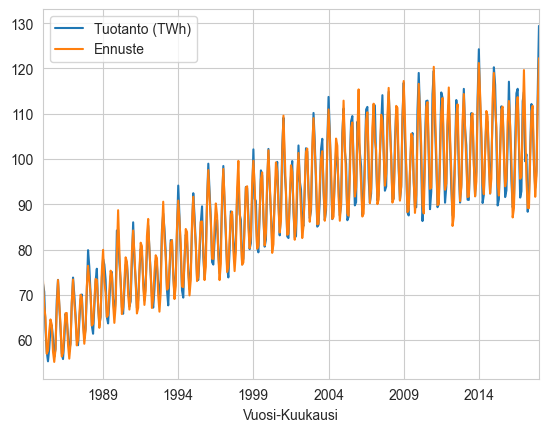

In [1594]:
electric_p_df.plot()

Tarkastellaan vielä ennustevirheet mallista jotta saadaan selville onko tämä toimiva.

In [1595]:
# Otetaan ennustemallin virheet omaksi sarakkeekseen.
electric_p_df['Ennustevirhe'] = model.resid
# Tarkastetaan lisäys
electric_p_df

,Tuotanto (TWh),Ennuste,Ennustevirhe
Vuosi-Kuukausi,,,
1985-01-01,72.5052,73.216106,-0.710906
1985-02-01,70.6720,67.505259,3.166741
1985-03-01,62.4502,65.031906,-2.581706
1985-04-01,57.4714,56.983062,0.488338
1985-05-01,55.3151,57.668271,-2.353171
...,...,...,...
2017-09-01,98.6154,99.641159,-1.025759
2017-10-01,93.6137,91.656717,1.956983
2017-11-01,97.3359,96.282026,1.053874


Tarkastellaan vielä graaffilla miten ennuste pitää paikkaansa vertailuna toteutuneeseen.

Text(0, 0.5, 'Ennustevirhe')

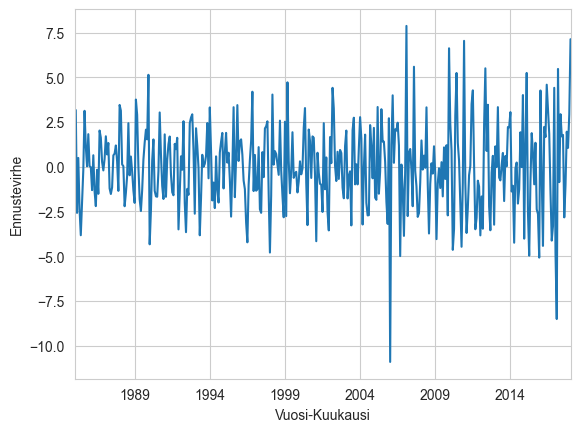

In [1596]:
electric_p_df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

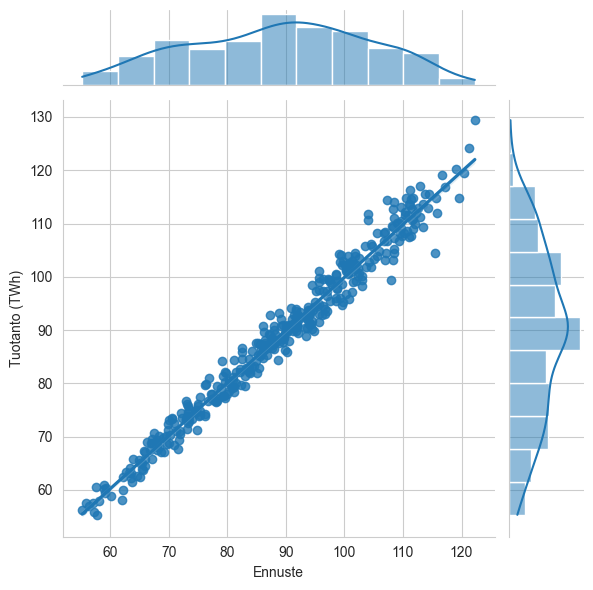

In [1597]:
sns.jointplot(data=electric_p_df, x='Ennuste', y='Tuotanto (TWh)', kind='reg')

Pääasiassa malli ennustaa ihan hyvin, mutta huomaamme että muutamia virhepiikkejä esiintyy.
Tätä Seabornin hajontakaaviota käytetään enemmän korrelaation osoittamiseen, mutta se osaltaan pystyy myös hyvin kuvaamaan miten hyvin ennuste pitää paikkaansa.

### Ennusteen laskeminen

Kokeillaan laskea ennustemallilla ennuste viiden vuoden päähän datan viimeisestä merkinnästä.

In [1598]:
# Tarkastetaan viimeisin päiväys.60
electric_p_df.tail()

,Tuotanto (TWh),Ennuste,Ennustevirhe
Vuosi-Kuukausi,,,
2017-09-01,98.6154,99.641159,-1.025759
2017-10-01,93.6137,91.656717,1.956983
2017-11-01,97.3359,96.282026,1.053874
2017-12-01,114.7212,111.787527,2.933673
2018-01-01,129.4048,122.278102,7.126698


Aloitamme siis helmikuusta 2018 ja tarkoitus olisi edetä tammihelmikuuhun 2023.

Ennusteen luominen
- Määritellään alkavaksi päiväykseksi ensimmäinen helmikuuta 2018.
- Ennusteen pituudeksi määritellään 60 kuukautta (viisi vuotta).
- Frekvenssiksi määritellään kuukauden alku (niin kuin ennustemallin kanssa)

In [1599]:
electric_p_forecast_range = pd.date_range('2018-02-01', periods=60, freq='MS')
electric_p_forecast = model.forecast(60)
# Määritellään ennusteen nimi kuvaavaksi
electric_p_forecast_df = pd.DataFrame(data=electric_p_forecast, index=electric_p_forecast_range, columns=['Tuotanto (TWh) ennuste'])
# Nimetään myös indeksi kuvaavasti.
electric_p_forecast_df.index.names = ['Vuosi-Kuukausi']
# Tarkastetaan tulokset.
electric_p_forecast_df

,Tuotanto (TWh) ennuste
Vuosi-Kuukausi,
2018-02-01,117.766982
2018-03-01,109.949148
2018-04-01,98.871172
2018-05-01,99.419733
2018-06-01,109.633942
2018-07-01,119.114208
2018-08-01,119.327209
2018-09-01,108.194070
2018-10-01,100.198942


Tarkastellaan miltä mallennettu ennuste näyttää sähkötuotannon osalta.

<Axes: xlabel='Vuosi-Kuukausi'>

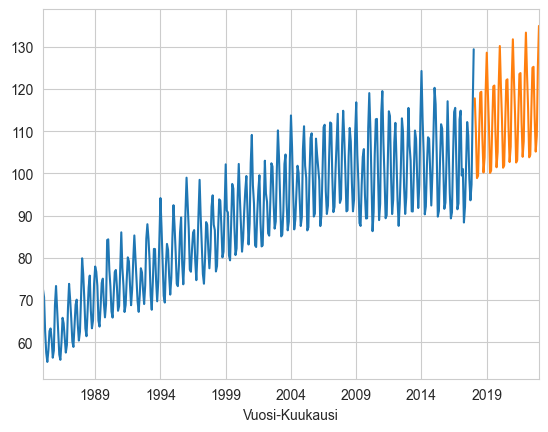

In [1600]:
electric_p_df['Tuotanto (TWh)'].plot()
electric_p_forecast_df['Tuotanto (TWh) ennuste'].plot()

Alustavasti ennuste näyttää ihan uskottavalta, mutta täytyy huomioida että vuodesta 2009 eteenpäin tuotannon nousu ei ole enää ollut niin suoraviivainen kuin ennen sitä ja tätä trendiä malli ei näytä ottavan huomioon. Voi siis olla että tuotantkokapasiteetti ei kasva enää samalla tavalla kuin ennen ja tästä syystä voisi olettaa että vaikka trendi onkin ollut nouseva tähän päivään asti, ei nousu ole enää jatkossa niin jyrkkä kuin ennuste antaa ymmärtää, vaikea sanoa.